In [1]:
import requests
#helps in http request
# import simplejson
import json as simplejson
#used or json handling , better than json as it gives specific error code for incompatible json
import re
#used for string operations
import operator
#used for numerical operations
import sys
#used for system calls
import urllib
#used to get or push http url requests
import os
#used for instructing os to perform functions on file system
import csv
#handle csv files
import numpy as np
#used for scientific calculation
from sklearn.svm import SVR
import pandas as pd
#used for ml
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


#INPUT THE COMPANY NAME
if(len(sys.argv)<2):
	print('invalid string')
	exit()
    
query=sys.argv[1]

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.isnull().values.any()

True

In [3]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()

Daily_Price.head()

Date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

In [5]:
# convert the date column into a time series with daily frequency

df['Date'] = pd.to_datetime(df['Date'])

In [6]:
indexed_df = df.set_index('Date')

In [7]:
ts = indexed_df['Close']

In [8]:
ts.head()

Date
2011-12-31    4.39
2011-12-31     NaN
2011-12-31     NaN
2011-12-31     NaN
2011-12-31     NaN
Name: Close, dtype: float64

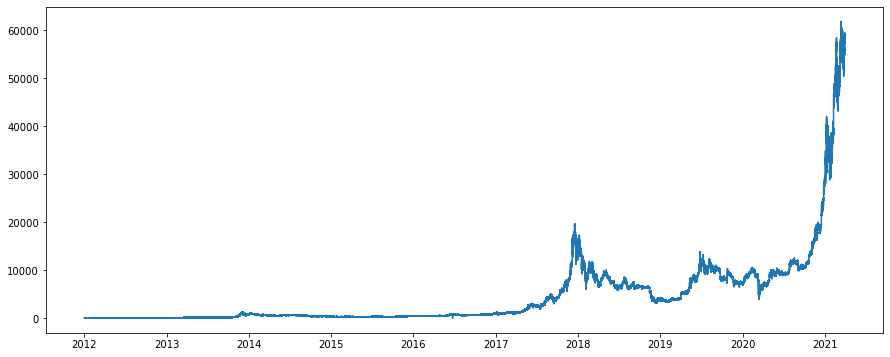

In [9]:
# visualize the time series to see how Bitcoin changes over time

plt.plot(ts)

In [10]:
# resamply by week

ts_week = ts.resample('W').mean()

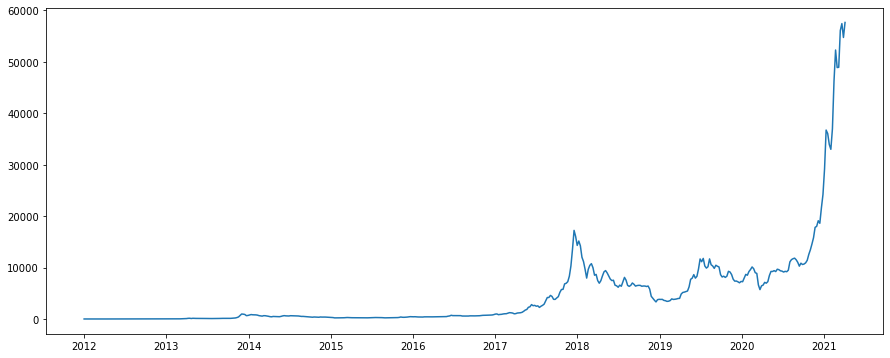

In [11]:
plt.plot(ts_week)

In [12]:
date=df['Date']
date

0         2011-12-31
1         2011-12-31
2         2011-12-31
3         2011-12-31
4         2011-12-31
             ...    
4857372   2021-03-30
4857373   2021-03-30
4857374   2021-03-30
4857375   2021-03-30
4857376   2021-03-31
Name: Date, Length: 4857377, dtype: datetime64[ns]

In [13]:
#COVERT THE DATA INTO TWO ARRAYS OF DATE AND PRICE

date=df['Date']
price=df['Close']

# with open(output_path_new) as datasource:
# 	r=csv.reader(datasource)
# 	next(r)
# 	for row in r:
# 		date.append(int(row[0].split('-')[2]))
# 		price.append(float(row[1]))

#reshape the date array into the numpy array of nX1

print(date)
#print(date)
#print(price)

0         2011-12-31
1         2011-12-31
2         2011-12-31
3         2011-12-31
4         2011-12-31
             ...    
4857372   2021-03-30
4857373   2021-03-30
4857374   2021-03-30
4857375   2021-03-30
4857376   2021-03-31
Name: Date, Length: 4857377, dtype: datetime64[ns]


In [14]:
# df = pd.read_csv('./Datasets/bitcoin_price.csv', parse_dates=['Date'], usecols=['Date','Close'])
# df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv', parse_dates=['Timestamp'], usecols=['Timestamp','Close'])
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.isnull().values.any()

True

In [15]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()

Daily_Price.head()

Date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
Name: Weighted_Price, dtype: float64

In [17]:
# convert the date column into a time series with daily frequency

df['Date'] = pd.to_datetime(df['Date'])

In [18]:
indexed_df = df.set_index('Date')

In [19]:
ts = indexed_df['Close']

In [20]:
ts.head()

Date
2011-12-31    4.39
2011-12-31     NaN
2011-12-31     NaN
2011-12-31     NaN
2011-12-31     NaN
Name: Close, dtype: float64

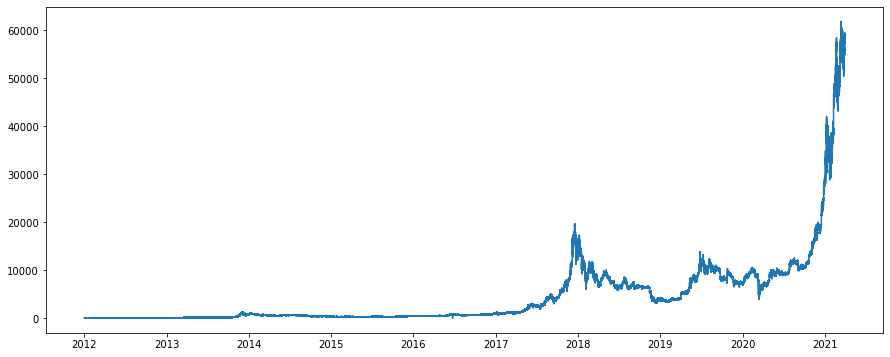

In [21]:
# visualize the time series to see how Bitcoin changes over time

plt.plot(ts)

In [22]:
# resamply by week

ts_week = ts.resample('W').mean()

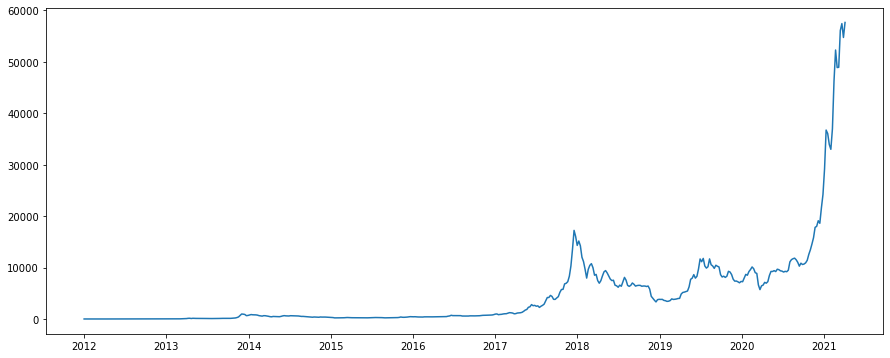

In [23]:
plt.plot(ts_week)

In [24]:
# check for stationarity

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    


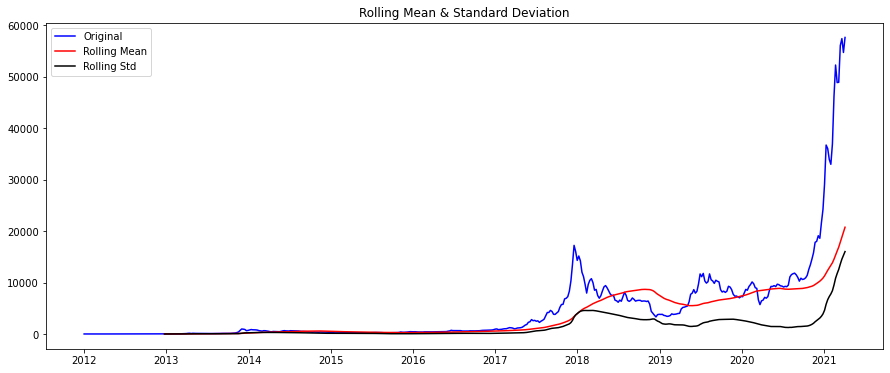

In [25]:
test_stationarity(ts_week)

Because the test statistic is more than the 5% critical value and the p-value is larger than 0.05, the moving average is not constant over time and the null hypothesis of the Dickey-Fuller test cannot be rejected. This shows that the weekly time series is not stationary.
Before you can apply ARIMA models for forecasting, you need to transform this time series into a stationary time series.

In [26]:
# apply a non linear log transform

ts_week_log = np.log(ts_week)

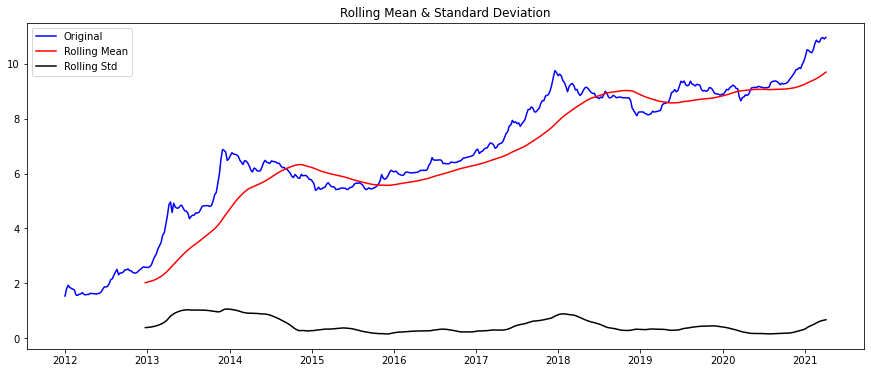

In [27]:
test_stationarity(ts_week_log)

The Dickey-Fuller test results confirm that the series is still non-stationary. Again the test statistic is larger than the 5% critical value and the p-value larger than 0.05.

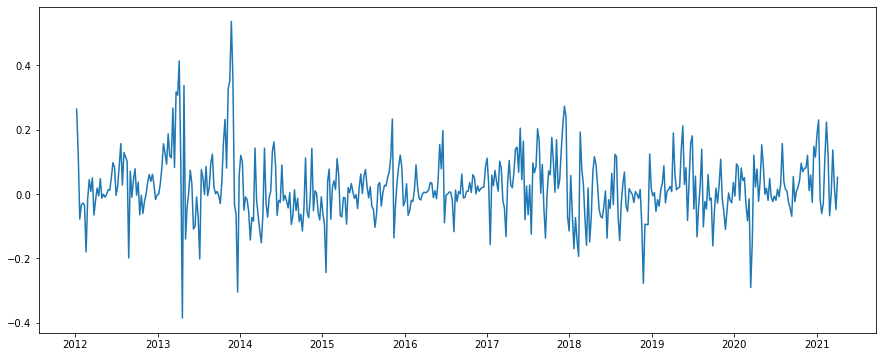

In [28]:
# remove trend and seasonality with differencing

ts_week_log_diff = ts_week_log - ts_week_log.shift()
plt.plot(ts_week_log_diff)

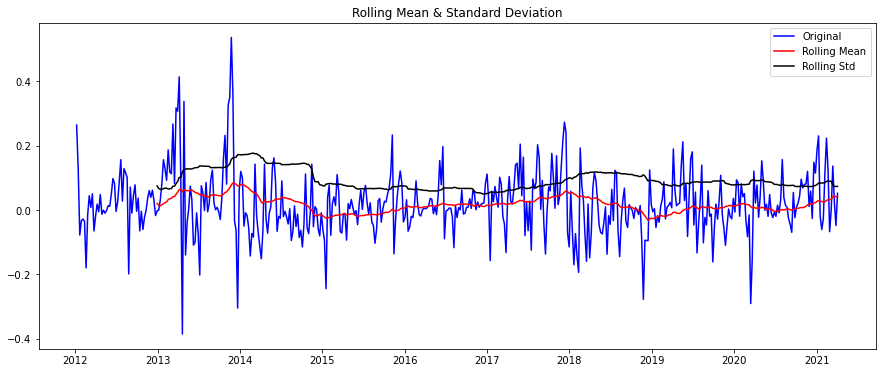

In [29]:
ts_week_log_diff.dropna(inplace=True)
test_stationarity(ts_week_log_diff)

In [ ]:
input()